In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data=load_breast_cancer()
x=data.data
y=data.target

In [7]:
data.data.shape

(569, 30)

In [8]:
lrl1=LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [9]:
#逻辑回归的重要属性coef_,查看每个特征所对应的参数
lrl1=lrl1.fit(x,y)
lrl1.coef_#各个特征所对应的参数

array([[ 4.00935918,  0.03204959, -0.13849297, -0.01622012,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50490376,  0.        , -0.07127329,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24596791, -0.12854467, -0.01441278,  0.        ,
         0.        , -2.03294747,  0.        ,  0.        ,  0.        ]])

In [10]:
(lrl1.coef_!=0).sum(axis=1)#一个有10个不为0的参数

array([10])

In [11]:
lrl2=lrl2.fit(x,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

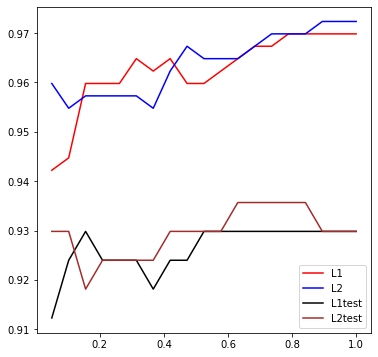

In [12]:
#接下来看看L1和L2哪个效果好
l1=[]
l2=[]
l1test=[]
l2test=[]
#因为逻辑回归对训练集的准确率有要求，尽可能达到100%，所以也创建两个训练集得分的列表（l1,l2）
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
   lrl1=LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
   lrl2=LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
   lrl1=lrl1.fit(Xtrain,Ytrain)
   l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
   l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
   lrl2=lrl2.fit(Xtrain,Ytrain)
   l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
   l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph=[l1,l2,l1test,l2test]
color=["red","blue","black","brown"]
label=["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)#loc4表示图例在右下角
plt.show()
#C取0.8-0.9效果最好，此时L2正则化会比较好

In [13]:
#embedded嵌入法加L1正则化进行降维
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [14]:
data=load_breast_cancer()
data.data.shape

(569, 30)

In [15]:
LR_=LR(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508145363408522

In [16]:
x_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
#norm_order=1代表使用L1范式进行筛选
x_embedded.shape

(569, 9)

In [17]:
cross_val_score(LR_,x_embedded,data.target,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


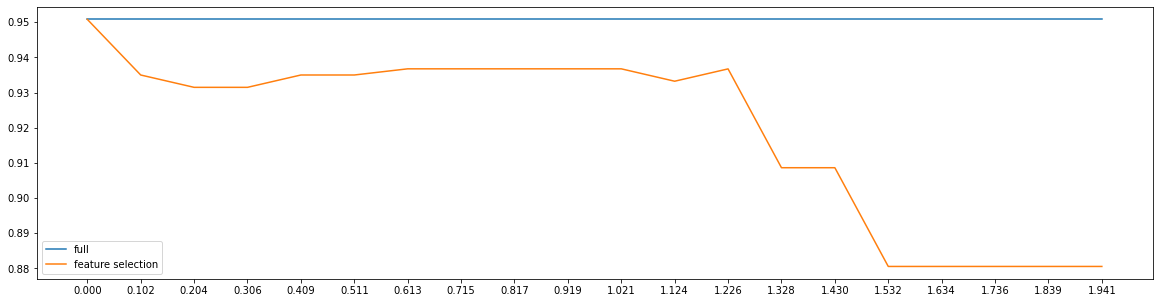

In [18]:
#接下来，我们尝试看看能不能进一步筛选特征
#（1）调节SelectFrom·Model中的threshold，现在是默认值threshold为none
fullx=[]
fsx=[]
threshold=np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
#abs((LR_.fit(data.data,data.target).coef_)).max()取coef_中绝对值最大的系数
k=0
for i in threshold:
    x_embedded=SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,x_embedded,data.target,cv=5).mean())
    print((threshold[k],x_embedded.shape[1]))
    #i==threshold[k]
    k+=1
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()
#得到的结果发现，效果并不好

0.9561090225563911 7.01


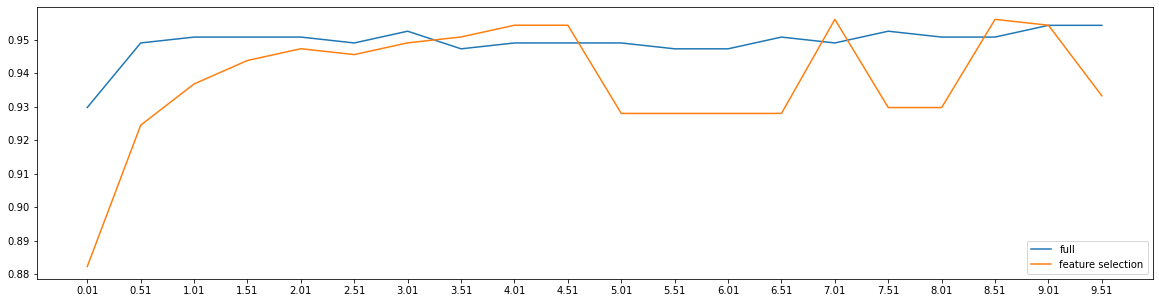

In [19]:
#（2）调整C来看看效果怎样
fullx=[]
fsx=[]
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_=LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    x_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,x_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
#print(max(fullx),C[fullx.index(max(fullx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()
#我们发现在C=7.01的时候效果最好，那么我们继续学习曲线

0.9561090225563911 6.069999999999999


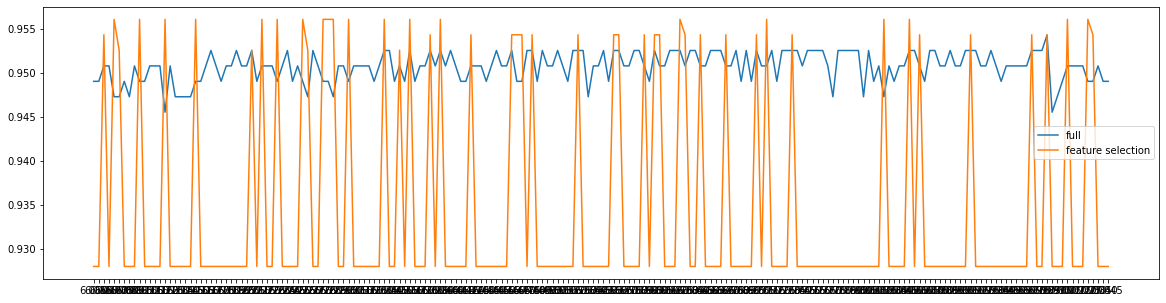

In [20]:
fullx=[]
fsx=[]
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_=LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    x_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,x_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
#print(max(fullx),C[fullx.index(max(fullx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [21]:
#下面验证模型效果：降维前
LR_=LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9473057644110275

In [22]:
#验证模型效果：降维后
LR_=LR(solver="liblinear",C=6.069999999999999,random_state=420)
x_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,x_embedded,data.target,cv=10).mean()

0.9561090225563911

In [23]:
x_embedded.shape

(569, 11)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


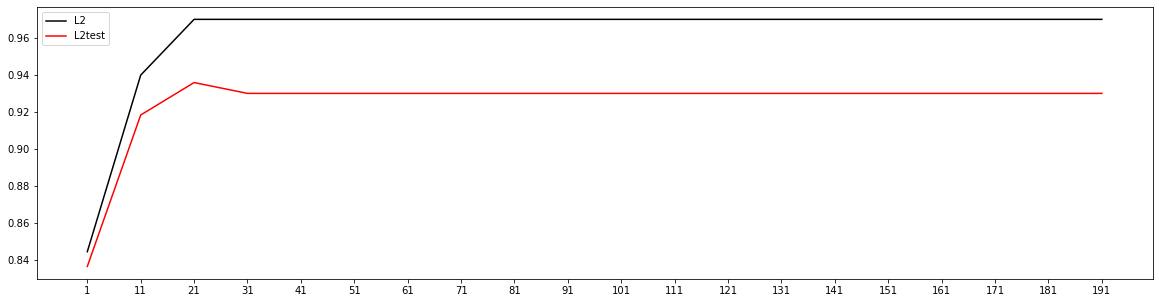

In [24]:
#接下来看max_iter最大迭代次数的学习曲线
#max_iter越大步长越小，迭代次数越多，时间越长，由步长找到最合适的塞塔，进而确定J塞塔的最小值
#J塞塔最小则模型在训练集上表现优异，拟合充分
l2=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2=LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph=[l2,l2test]
color=["black","red"]
label=["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend()
plt.xticks(np.arange(1,201,10))
plt.show()
#当迭代21次左右发现效果已经不错了

In [25]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr=LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_
#说明在迭代25次的时候就停下了

array([25], dtype=int32)

In [26]:
#二元回归与多元回归
#处理多分类时可以把它转换为二分类上。有“一对多”和“多对多”

In [27]:
#一对多称为ovr，多对多称为mvm
#来看看这两种的对比
from sklearn.datasets import load_iris
iris=load_iris()

In [28]:
for multi_class in ('multinomial','ovr'):
    clf=LR(solver='sag',max_iter=100,random_state=42,multi_class=multi_class).fit(iris.data,iris.target)
#%的用法：用来代替打印的字符串中，想替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串
#字符串后的%后使用元组来容纳变量，字符串中有几个%，元组中就需要几个变量
    print("train score:%.3f(%s)"%(clf.score(iris.data,iris.target),multi_class))    
#如果是三分类及以上优先选择多分类

train score:0.987(multinomial)
train score:0.960(ovr)


D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
